In [3]:
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [9]:
file_dir = os.path.pardir + os.sep + 'data' + os.sep + 'imgs'
img_path = os.path.join(file_dir, 'Dog.JPG')
img_path

'..\\data\\imgs\\Dog.JPG'

In [10]:
image = cv2.imread(img_path)
image = image[:, :, ::-1]

In [11]:
Ground_Truth_BBOX = [1900, 700, 1800, 1800]

##這裡是自己隨意設的，數字可以更改
Region_Proposal = [1800, 800, 1500, 1500]

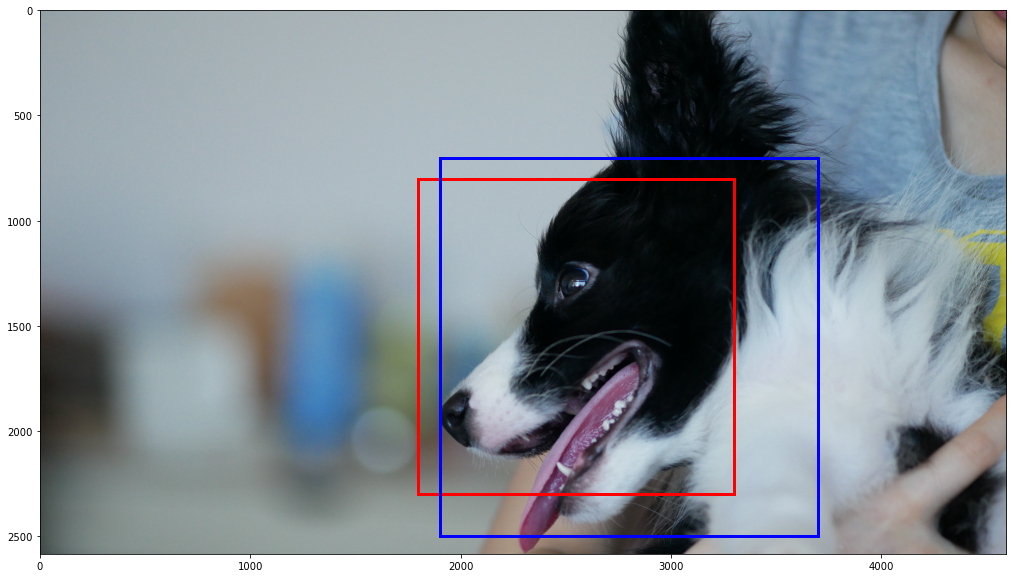

In [12]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots(1)
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Region_Proposal[0], Region_Proposal[1]), 
                         Region_Proposal[2], Region_Proposal[3], linewidth=3, edgecolor='r',
                         facecolor='none')
# ax.text(1800,800,'Region_Proposal',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]),
                           Ground_Truth_BBOX[2], Ground_Truth_BBOX[3], linewidth=3, edgecolor='b',
                           facecolor='none')
# ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)

plt.show()

In [13]:
tx = (Ground_Truth_BBOX[0] - Region_Proposal[0]) / Region_Proposal[2]
ty = (Ground_Truth_BBOX[1] - Region_Proposal[1]) / Region_Proposal[3]

# np.log，自然對數
tw = np.log(Ground_Truth_BBOX[2] / Region_Proposal[2])
th = np.log(Ground_Truth_BBOX[3] / Region_Proposal[3])

print('x偏移量： ', tx)
print('y偏移量： ', ty)
print('w縮放量： ', tw)
print('h縮放量： ', th)

x偏移量：  0.06666666666666667
y偏移量：  -0.06666666666666667
w縮放量：  0.1823215567939546
h縮放量：  0.1823215567939546


In [14]:
# 假設Predict值 dx,dy,dw,dh
dx, dy, dw, dh = [0.05, -0.05, 0.12, 0.17]
loss = np.sum(np.square(np.array([tx, ty, tw, th]) - np.array([dx, dy, dw, dh]) ))
print('Loss: {}'.format(loss))

Loss: 0.004591352758604312
